In [1]:
!pip install transformers

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
classifier("bad")

[{'label': 'NEGATIVE', 'score': 0.999782383441925}]

In [6]:
classifier("The weather is good")

[{'label': 'POSITIVE', 'score': 0.9998511075973511}]

In [7]:
classifier("Nasser")

[{'label': 'POSITIVE', 'score': 0.9805034399032593}]

In [8]:
classifier("Riyadh traffic")

[{'label': 'POSITIVE', 'score': 0.9948284029960632}]

In [14]:
from transformers import pipeline

ar_classifier = pipeline("sentiment-analysis", model='CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
ar_classifier("انا بخير")

[{'label': 'positive', 'score': 0.7388663291931152}]

In [17]:
ar_classifier("الاختبار اليوم كان صعب للغاية")

[{'label': 'negative', 'score': 0.8668689727783203}]

In [18]:
ar_classifier("ياللهول!")

[{'label': 'positive', 'score': 0.42398762702941895}]

## Zero shot classification


In [19]:
from transformers import pipeline

zero_shot_classifier= pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
zero_shot_classifier("الطريق مزدحم",
                     candidate_labels=["Traffic", "Education"])

{'sequence': 'الطريق مزدحم',
 'labels': ['Education', 'Traffic'],
 'scores': [0.5636106729507446, 0.436389297246933]}

In [21]:
zero_shot_classifier("one day I will see the world",
                     candidate_labels=["Traffic", "Education", "Travling"])

{'sequence': 'one day I will see the world',
 'labels': ['Travling', 'Traffic', 'Education'],
 'scores': [0.5019924640655518, 0.27068668603897095, 0.22732077538967133]}

In [23]:
zero_shot_classifier("I was in makkah last week doing umrah",
                     candidate_labels=["Traffic", "Travling", "Religion"])

{'sequence': 'I was in makkah last week doing umrah',
 'labels': ['Religion', 'Traffic', 'Travling'],
 'scores': [0.9752114415168762, 0.01247214525938034, 0.012316392734646797]}

In [24]:
from transformers import set_seed
set_seed(42)

zero_shot_classifier("I was in makkah last week doing umrah",
                     candidate_labels=["Traffic", "Travling", "Religion"])

{'sequence': 'I was in makkah last week doing umrah',
 'labels': ['Religion', 'Traffic', 'Travling'],
 'scores': [0.9752114415168762, 0.01247214525938034, 0.012316392734646797]}

In [29]:
from transformers import set_seed
set_seed(42)

zero_shot_classifier("Yesterday, I played black ops",
                     candidate_labels=["Game", "Cooking", "Religion"])

{'sequence': 'Yesterday, I played black ops',
 'labels': ['Game', 'Religion', 'Cooking'],
 'scores': [0.6633192896842957, 0.17419615387916565, 0.1624845564365387]}

In [32]:
from transformers import set_seed
set_seed(42)

zero_shot_classifier("people in danger on the road",
                     candidate_labels=["Games", "Ambulance", "Religion"])

{'sequence': 'people in danger on the road',
 'labels': ['Ambulance', 'Games', 'Religion'],
 'scores': [0.513344407081604, 0.31314218044281006, 0.17351335287094116]}

In [33]:
from transformers import pipeline

zero_shot_classifier_ar= pipeline("zero-shot-classification",  model="morit/arabic_xlm_xnli")

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [36]:
zero_shot_classifier_ar(" مستر فيفا عراب اليوتيوب",
                     candidate_labels=["Youtube", "Entertainment", "People"])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': ' مستر فيفا عراب اليوتيوب',
 'labels': ['People', 'Entertainment', 'Youtube'],
 'scores': [0.5914415121078491, 0.38969510793685913, 0.018863333389163017]}

### Summarization

In [34]:
from transformers import pipeline

summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
summarizer?

In [42]:
text_to_summarize = """ To build the best future for our country, we have based
our Vision for the Kingdom of Saudi Arabia on three
pillars that represent our unique competitive
advantages. Our status will enable us to build on our
leading role as the heart of Arab and Islamic worlds. At
the same time, we will use our investment power to
create a more diverse and sustainable economy. Finally,
we will use our strategic location to build our role as an
integral driver of international trade and to connect
three continents: Africa, Asia and Europe. """

summary = summarizer(text_to_summarize, max_length=25)

Your min_length=56 must be inferior than your max_length=25.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1282: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (25). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


In [43]:
summary[0]

{'summary_text': " Saudi Arabia's status will enable us to build on our leading role as the heart of Arab and Islamic worlds,"}

In [45]:
len(summary[0]['summary_text'])

107

#### NER

In [47]:
from transformers import pipeline

ner = pipeline("token-classification", model="dslim/bert-base-NER")

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [57]:
ner("Welcome in T5, my name is Nasser and I am from Riyadh")

[{'entity': 'B-PER',
  'score': 0.9960069,
  'index': 9,
  'word': 'Na',
  'start': 26,
  'end': 28},
 {'entity': 'B-PER',
  'score': 0.87902725,
  'index': 10,
  'word': '##sser',
  'start': 28,
  'end': 32},
 {'entity': 'B-LOC',
  'score': 0.99929607,
  'index': 15,
  'word': 'R',
  'start': 47,
  'end': 48},
 {'entity': 'I-LOC',
  'score': 0.95131314,
  'index': 16,
  'word': '##iya',
  'start': 48,
  'end': 51},
 {'entity': 'I-LOC',
  'score': 0.5137106,
  'index': 17,
  'word': '##dh',
  'start': 51,
  'end': 53}]

In [59]:
ner("Welcome in T5, my name is Nasser and I am from Riyadh", grouped_entities=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9960069,
  'word': 'Na',
  'start': 26,
  'end': 28},
 {'entity_group': 'PER',
  'score': 0.87902725,
  'word': '##sser',
  'start': 28,
  'end': 32},
 {'entity_group': 'LOC',
  'score': 0.8214399,
  'word': 'Riyadh',
  'start': 47,
  'end': 53}]

##### Fill Mask

In [60]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="CAMeL-Lab/bert-base-arabic-camelbert-da")

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [63]:
unmasker("كان الامتحان [MASK] للغاية")

[{'score': 0.24916674196720123,
  'token': 7883,
  'token_str': 'سهل',
  'sequence': 'كان الامتحان سهل للغاية'},
 {'score': 0.17712534964084625,
  'token': 5366,
  'token_str': 'صعب',
  'sequence': 'كان الامتحان صعب للغاية'},
 {'score': 0.09369416534900665,
  'token': 16105,
  'token_str': 'سيء',
  'sequence': 'كان الامتحان سيء للغاية'},
 {'score': 0.04399631544947624,
  'token': 22677,
  'token_str': 'صعبا',
  'sequence': 'كان الامتحان صعبا للغاية'},
 {'score': 0.032930415123701096,
  'token': 25294,
  'token_str': 'ممتع',
  'sequence': 'كان الامتحان ممتع للغاية'}]

In [65]:
unmasker(["كان الامتحان [MASK] للغاية"], top_k=10)

[{'score': 0.24916674196720123,
  'token': 7883,
  'token_str': 'سهل',
  'sequence': 'كان الامتحان سهل للغاية'},
 {'score': 0.17712534964084625,
  'token': 5366,
  'token_str': 'صعب',
  'sequence': 'كان الامتحان صعب للغاية'},
 {'score': 0.09369416534900665,
  'token': 16105,
  'token_str': 'سيء',
  'sequence': 'كان الامتحان سيء للغاية'},
 {'score': 0.04399631544947624,
  'token': 22677,
  'token_str': 'صعبا',
  'sequence': 'كان الامتحان صعبا للغاية'},
 {'score': 0.032930415123701096,
  'token': 25294,
  'token_str': 'ممتع',
  'sequence': 'كان الامتحان ممتع للغاية'},
 {'score': 0.028355812653899193,
  'token': 6842,
  'token_str': 'جيد',
  'sequence': 'كان الامتحان جيد للغاية'},
 {'score': 0.027179842814803123,
  'token': 7018,
  'token_str': 'رائع',
  'sequence': 'كان الامتحان رائع للغاية'},
 {'score': 0.021684668958187103,
  'token': 10078,
  'token_str': 'سريع',
  'sequence': 'كان الامتحان سريع للغاية'},
 {'score': 0.02127445675432682,
  'token': 3814,
  'token_str': 'جميل',
  'seque

###### Translation

In [66]:
from transformers import pipeline

translator = pipeline("translation", model="PRAli22/arat5-arabic-dialects-translation")

config.json:   0%|          | 0.00/875 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

In [74]:
translator("Fares ate  kabsah", src_lang="en", tgt_lang="ar")

[{'translation_text': 'فريس أخرج الكباش'}]

In [76]:
from transformers import pipeline

img_classifier= pipeline("image-classification", model="umm-maybe/AI-image-detector")

config.json:   0%|          | 0.00/937 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/348M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

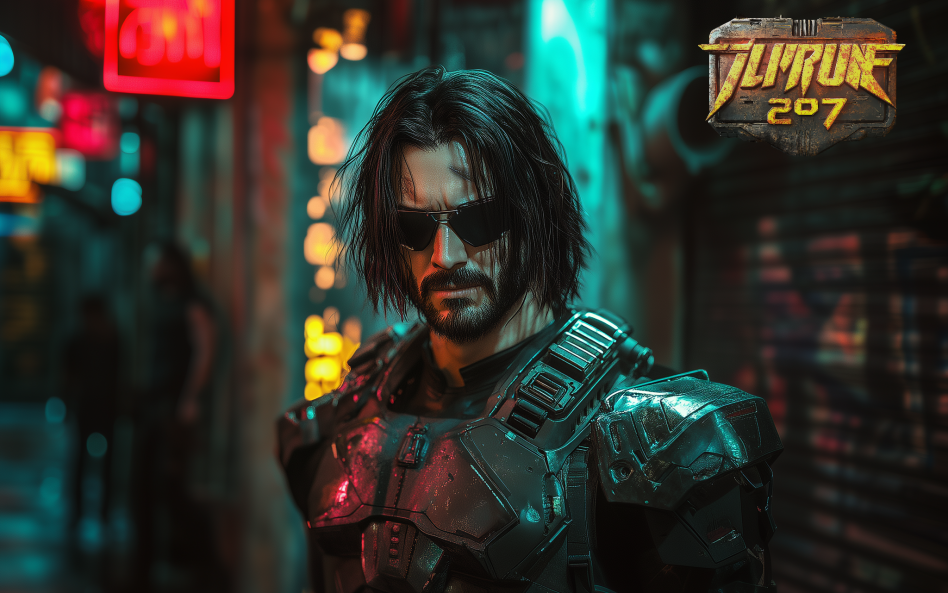

In [77]:
from keras.preprocessing.image import load_img

img = load_img('/content/Ai_generate_pic.webp')
img

In [78]:
img_classifier(img)

[{'label': 'artificial', 'score': 0.7652218341827393},
 {'label': 'human', 'score': 0.5774454474449158}]

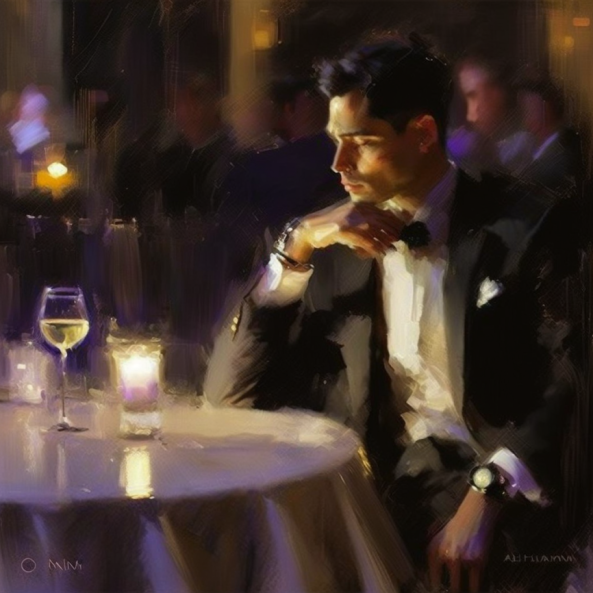

In [79]:
img2 = load_img('/content/img2.webp')
img2

In [80]:
img_classifier(img2)

[{'label': 'human', 'score': 0.7255356907844543},
 {'label': 'artificial', 'score': 0.44582512974739075}]

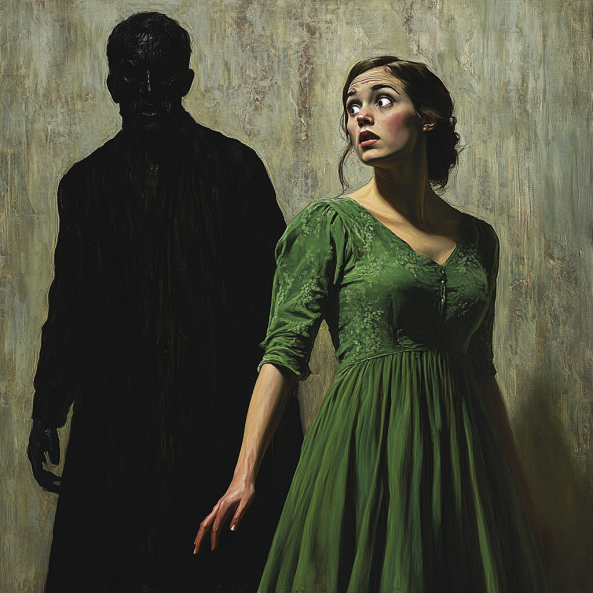

In [81]:
img3 = load_img('/content/img3.webp')
img3

In [82]:
img_classifier(img3)

[{'label': 'human', 'score': 0.6229982376098633},
 {'label': 'artificial', 'score': 0.558561384677887}]

In [1]:
# khaled = load_img('/content/khaled.jpeg')
# khaled

In [84]:
img_classifier(khaled)

[{'label': 'human', 'score': 0.5672258138656616},
 {'label': 'artificial', 'score': 0.3974232077598572}]

In [2]:
# abdulrahman = load_img('/content/abdulrahman.jpeg')
# abdulrahman

In [86]:
img_classifier(abdulrahman)

[{'label': 'artificial', 'score': 0.7087122201919556},
 {'label': 'human', 'score': 0.4647095501422882}]

In [3]:
# fares = load_img('/content/fares.jpeg')
# fares

In [88]:
img_classifier(fares)

[{'label': 'artificial', 'score': 0.6238639950752258},
 {'label': 'human', 'score': 0.5483910441398621}]

In [89]:
nasser = load_img('/content/nasser.jpeg')
nasser

Output hidden; open in https://colab.research.google.com to view.

In [90]:
img_classifier(nasser)

[{'label': 'artificial', 'score': 0.5312579274177551},
 {'label': 'human', 'score': 0.479245126247406}]

In [99]:
from transformers import pipeline

zero_shot_img_classifier= pipeline("zero-shot-classification",  model="google/siglip-so400m-patch14-384")

model.safetensors:  21%|##        | 724M/3.51G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [101]:
zero_shot_img_classifier= ([khaled],
                           candidate_labels["human", "cat", "dog"])

NameError: name 'candidate_labels' is not defined

#########object detection

In [91]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 12.0 MB/s eta 0:00:00


In [94]:
from ultralytics import YOLO

model = YOLO("yolov8s-world.pt")

100%|██████████| 25.9M/25.9M [00:00<00:00, 132MB/s]


In [119]:
load_img= ("/content/bike.jpg")

In [97]:
model.set_classes = (["Motorbike", "Bus", "Car", "Truck", "Person"])

results = model.predict(load_img)

# results = model.track(source="path/to/video.mp4")

results[0].show


image 1/1 /content/bike.jpg: 448x640 1 person, 1 motorcycle, 458.6ms
Speed: 4.1ms preprocess, 458.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


<bound method Results.show of ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
obb: None
orig_img: array([[[160, 126,  96],
        [161, 127,  97],
        [162, 128,  98],
        ...,
        [187, 158, 131],
        [187, 158, 131],
        [186, 157, 130]],

       [[160, 126,  96],
        [161, 127,  97],
        [162, 128,  98],
        ...,
        [188, 159, 132],
        [187, 158, 131],
        [187, 158, 131]],

       [[161, 127,  97],
        [162, 128,  98],
        [163, 129,  99],
        ...,
        [189, 160, 133],
        [188, 159, 132],
        [188, 159, 132]],

       ...,

       [[ 37,  52,  68],
        [ 24,  39,  55],
        [ 27,  42,  58],
        ...,
        [ 68,  85, 106],
        [ 72,  86, 108],
        [ 75,  90, 109]],

       [[ 36,  51,  67],
        [ 28,  43,  59],
        [ 31,  46,  62],
        ...,
        [ 60,  74,  96],
        [ 54,  68,  87],
        [ 49,  63,  82]],

       [[ 33,  48,  64],
        [ 33,  48,  64],
        [ 37,  52,  68],
        ...,
        [ 61,  75,  97],
        [ 46,  60,  79],
        [ 35,  49,  68]]], dtype=uint8)
orig_shape: (467, 700)
path: '/content/bike.jpg'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 4.1446685791015625, 'inference': 458.61053466796875, 'postprocess': 1.222372055053711}>

In [122]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [102]:
from transformers import pipeline

zero_shot_object_detection = pipeline("zero-shot-object-detection", model="google/owlvit-base-patch32")

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

In [127]:
zero_shot_object_detection(load_img,candidate_labels=["Motorbike", "Bus", "Car", "Person"])

[{'score': 0.1472381055355072,
  'label': 'Person',
  'box': {'xmin': 223, 'ymin': 89, 'xmax': 388, 'ymax': 349}},
 {'score': 0.11121664196252823,
  'label': 'Motorbike',
  'box': {'xmin': 148, 'ymin': 181, 'xmax': 442, 'ymax': 414}}]

In [128]:
!pip install av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 10.5 MB/s eta 0:00:00


In [129]:
from transformers import pipeline

video_classification = pipeline("video-classification", model="microsoft/xclip-large-patch14-16-frames")

ImportError: 
VideoClassificationPipeline requires the PyAv library but it was not found in your environment. You can install it with:
```
pip install av
```
Please note that you may need to restart your runtime after installation.


In [ ]:
import cv2
cap = cv2.VideoCapture('/content/motivational video ai generate.mp4')
while(1):
    _ , img2=cap.read()
    cv2.namedWindow('video',cv2.WINDOW_NORMAL)
    cv2.imshow('video',img2)
    k=cv2.waitKey(1) & 0xFF
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
video_classification("cap")

AttributeError: 'XCLIPConfig' object has no attribute 'num_frames'